In [20]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import svm


import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [21]:
df_ad = pd.read_csv('data/train.csv')
df_ad

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


In [23]:
df_test=df_ad
df_test['click_time_dt'] = pd.to_datetime(df_test['click_time'], format='%Y/%m/%d %H:%M:%S')
df_test.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_time_dt
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0,2017-11-06 14:32:21
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0,2017-11-06 14:33:34
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0,2017-11-06 14:34:12
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0,2017-11-06 14:34:52
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0,2017-11-06 14:35:08


In [25]:
df_test['month']=df_test['click_time_dt'].dt.month
df_test['year']=df_test['click_time_dt'].dt.year
df_test['month'].value_counts()

11    184903890
Name: month, dtype: int64

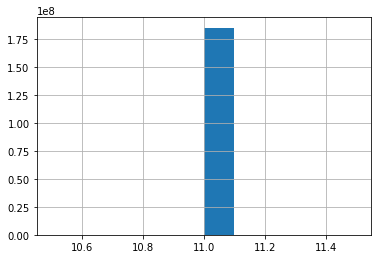

In [26]:
df_test['month'].hist()

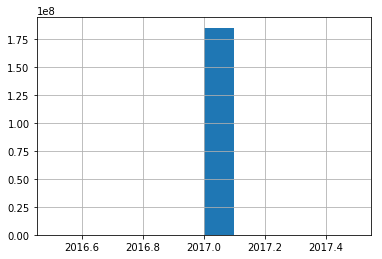

In [27]:
df_test['year'].hist()

In [28]:
df_test['is_attributed'].value_counts()

0    184447044
1       456846
Name: is_attributed, dtype: int64

In [ ]:
df_test.corr()

In [3]:
df_download = df_ad[df_ad.is_attributed == 1]


In [4]:
df_notDownload = df_ad[df_ad.is_attributed != 1].sample(len(df_download)*2)


In [5]:
len(df_ad) - len(df_download)

184447044

In [6]:
df_download.shape

(456846, 8)

In [7]:
df_notDownload.shape

(913692, 8)

In [8]:
df_sample = df_notDownload.append(df_download, ignore_index=True)

In [9]:
df_sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,117867,12,1,18,19,2017-11-08 23:43:20,NaN,0
1,43715,17,1,13,280,2017-11-08 05:36:19,NaN,0
2,183537,2,1,13,477,2017-11-06 17:21:36,NaN,0
3,46323,3,1,13,402,2017-11-09 06:26:40,NaN,0
4,4248,9,1,13,489,2017-11-07 10:28:31,NaN,0


In [10]:
with open('all_clean_data.pkl', 'wb') as picklefile:
    pickle.dump(df_sample, picklefile)

In [11]:
with open("all_clean_data.pkl", 'rb') as picklefile: 
    df_all = pickle.load(picklefile)
df_all.shape


(1370538, 8)

In [15]:
def convertDF(df_old):
    df_old['click_time'] = pd.to_datetime(df_old['click_time'], format='%Y/%m/%d %H:%M:%S')
    df_old['hour']=df_old['click_time'].dt.hour
    df_old['date']=df_old['click_time'].dt.date
    df_old['day']=df_old['click_time'].dt.day
    df_old['month']=df_old['click_time'].dt.month
    df_old['year']=df_old['click_time'].dt.year
    return df_old

In [ ]:
df_new = convertDF(df_all)
df_new.head()

In [ ]:
with open('all_converted_data.pkl', 'wb') as picklefile:
    pickle.dump(df_new, picklefile)